## Codio Activity 6.5: Creating the K-Means Algorithm

This exercise focuses on initially choosing the center points for each of the clusters.  Given three different datasets, you should choose cluster centers that make sense given the data.  Here, we will choose the centers given specific options.  Think about a more general approach to selecting the centers as you work through these examples. 

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles, make_moons

### Creating Data

Using the `sklearn` dataset utilities we create and plot three datasets below.  Your task will be to determine a starting place for the clusters by choosing appropriate cluster centers.  The clusters have been colored according to the labels created for demonstration purposes.  Recall that in a real clustering scenario you won't have labels on your data.

In [2]:
n_samples = 1500

## Problem 1

### Choosing Initial Centers

Which of the following options do you think would serve as good initial cluster centers for the dataset "Cluster Group I" visualized below.  Enter your answer as a string to `ans1` below.  

```
a) (-2, -5), (2, -5), (10, -5)
b) (-5, -5), (2, 2), (2, -7)
c) (-2, 5), (8, 5), (10, -5)
```

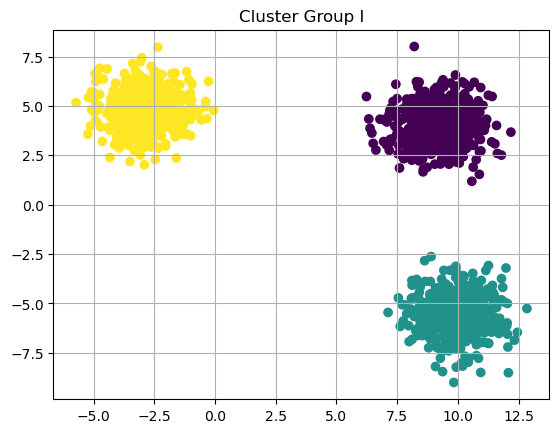

In [4]:
X1,Y1 = make_blobs(n_samples = n_samples, random_state = 24)
plt.scatter(X1[:,0],X1[:,1],c = Y1)
plt.title('Cluster Group I')
plt.grid()

In [5]:
ans1 = 'c'

## Problem 2

## Choosing Initial Centers

Below, a second dataset is created.  Again, your task is to identify what appropriate starting centers could be.  Assign your answer as a string to `ans2` below.

```
a) (-6, 5), (-1, 5), (3, 5)
b) (-4, -7), (1, 6), (3, -7)
c) (-6, 6), (0, 7), (6, 7)
```

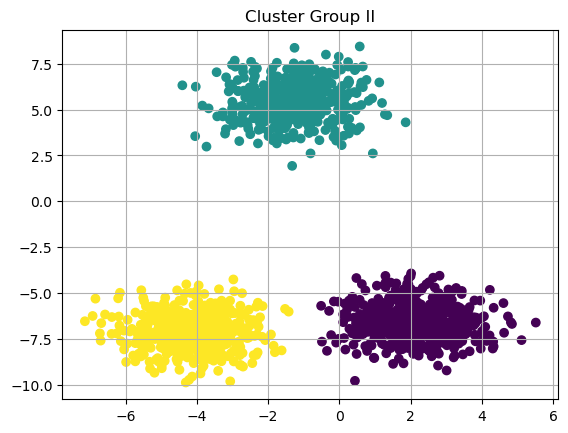

In [13]:
X2,Y2 = make_blobs(n_samples = n_samples, random_state = 111)
plt.scatter(X2[:,0],X2[:,1],c = Y2)
plt.title('Cluster Group II')
plt.grid()

In [14]:
ans2 = 'b'

## Problem 3

### Choosing Initial Centers

Once again, given the data below, choose the best initial centers for clustering.  Assign your answer as a string to `ans3` below.  

```
a) (-5, -10), (7, 0), (10, 0)
b) (-5, -10), (7, 10), (10, 10)
c) (-5, -10), (7, 0), (10, 10)
```

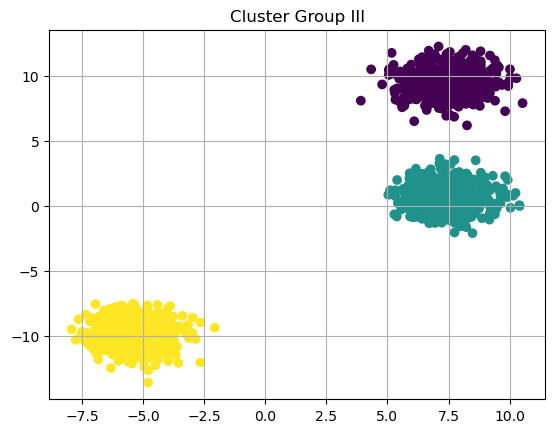

In [15]:
X3,Y3 = make_blobs(n_samples = n_samples, random_state = 8)
plt.scatter(X3[:,0],X3[:,1],c = Y3)
plt.title('Cluster Group III')
plt.grid()

In [16]:
ans3 = 'c'

## Codio Activity 6.6: Applying K-Means in Python

This assignment walks through an initial centroid assignment using a random selection strategy.  After the initial centroids are selected, the within cluster sum of squares is computed.  Once the sum of squares for each cluster center and observation are determined, a label is chosen based on the smallest sum of squares.  Finally, within each of these clusters the centers are updated based on the within cluster mean.  Formally, the KMeans objective function is:

$${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)

### The Data

We will use the built in dataset generator from `sklearn` to create a small dataset to demonstrate a simple case of KMeans clustering.  Below, the data are created and plotted.  It seems there are three clusters so we will assume there should be three cluster centers.

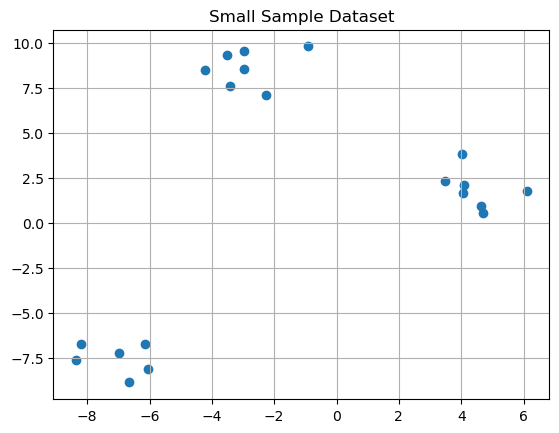

In [18]:
X1,_ = make_blobs(n_samples = 20, random_state = 42)
plt.scatter(X1[:,0],X1[:,1])
plt.title('Small Sample Dataset')
plt.grid()

### Creating a `DataFrame`

Using `pandas`, a `DataFrame` is created to hold the small dataset.  The features are named `X1` and `X2`.  The `DataFrame` is named `df`.

In [21]:
df = pd.DataFrame(X1,columns = ['X1','X2'])
df.head()

,X1,X2
0,-2.978672,9.556846
1,-4.234115,8.451999
2,-3.522029,9.328533
3,-2.267235,7.101006
4,3.488885,2.348868


### Randomly Selecting Centers

As noted, we will make initial cluster centroid assignments based on a random selection of data from the samples.  Below, the `.sample` method from the DataFrame is used to select three points at random.  These are assigned to the variable `centroids` as a DataFrame.

In [23]:
centroids = df.sample(3, random_state=11).reset_index(drop = True)
centroids

,X1,X2
0,-2.267235,7.101006
1,-8.207813,-6.683248
2,-6.670764,-8.839780


### Assigning initial centroid values

Now, we select the individual centroid values and assign them as `c1`, `c2`, `c3` below.  

In [26]:
c1 = centroids.iloc[0,:2].values
c2 = centroids.iloc[1,:2].values
c3 = centroids.iloc[2,:2].values
print(c1,c2,c3)

[-2.26723535  7.10100588] [-8.20781324 -6.68324836] [-6.6707636  -8.83977972]


### Inner cluster sum of squares

To find the inter cluster variance, we can use the `np.linalg.norm` function.  This finds the distances squared from each of the cluster centers to each datapoint.  These distances are assembled into a DataFrame called `dist_df` and the three columns represent the three cluster centers.  Note that there should be a value of zero in each column because the centers were chosen as datapoints from the dataset.  

In [32]:
d1 = np.linalg.norm(df.iloc[:,:2] - c1, axis = 1)**2
d2 = np.linalg.norm(df.iloc[:,:2] - c2, axis = 1)**2
d3 = np.linalg.norm(df.iloc[:,:2] - c3, axis = 1)**2
print(d1,d2,d3)

[  6.53729364   5.69379866   6.53638556   0.          55.71574177
 225.29613063   2.59296332  85.78294811  65.65377384  69.14293808
 273.49970657  98.76432633 205.71641452   1.5734461  226.33614788
   8.97447179 253.21744695 245.46250103  91.58199864  50.487445  ] [291.08458833 244.86597451 278.33373334 225.29613063 218.39187629
   0.         259.4151727  222.45690727 228.23768275 219.95892912
   7.01314911 275.94744631   4.27170298 227.01758588   1.71821691
 324.06199794   0.86294977   6.63553081 219.0999638  260.39685635] [352.06738439 304.94285149 340.00213491 273.49970657 228.40429593
   7.01314911 316.03053274 222.79016749 235.24332737 225.40100064
   0.         275.32185112   4.82180401 280.91707728   2.85615056
 379.71682475   4.38443841   0.92246932 217.6010891  275.0892962 ]


In [35]:
dist_df = pd.DataFrame(np.array([d1,d2,d3]).T,columns = ['d1','d2','d3'])
dist_df
                    

,d1,d2,d3
0,6.537294,291.084588,352.067384
1,5.693799,244.865975,304.942851
2,6.536386,278.333733,340.002135
3,0.000000,225.296131,273.499707
4,55.715742,218.391876,228.404296
5,225.296131,0.000000,7.013149
6,2.592963,259.415173,316.030533
7,85.782948,222.456907,222.790167
8,65.653774,228.237683,235.243327
9,69.142938,219.958929,225.401001


## Problem 1

### What were the original centers

In the distance data above, which data point was the original centroid of the first column?  Assign the index of the datapoint as an integer to `ans1` below.

In [36]:
ans61 = 3

### Finding the `argmin`

For each of the observations, we want to assign them to the cluster where the inter cluster variance is minimized.  To do so, we can use the `np.argmin` function and apply it across the rows.  Note that this returns a label for which cluster the point will be assigned.  These labels are added to the original DataFrame and the points are plotted.  

In [38]:
#finding smallest variance
np.argmin(dist_df.values,axis = 1)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0])

In [42]:
#create new column of labels
df['cluster_label'] = np.argmin(dist_df.values, axis = 1)
df.head()

,X1,X2,cluster_label
0,-2.978672,9.556846,0
1,-4.234115,8.451999,0
2,-3.522029,9.328533,0
3,-2.267235,7.101006,0
4,3.488885,2.348868,0


Text(0.5, 1.0, 'Cluster assignments after random centroids')

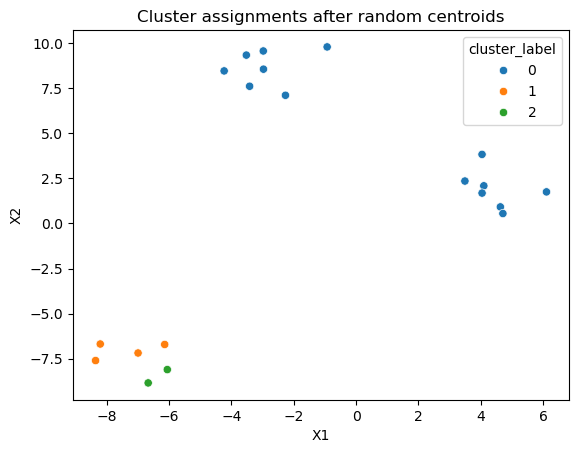

In [47]:
sns.scatterplot(data = df, x = 'X1', y = 'X2', hue = 'cluster_label', palette = 'tab10')
plt.title('Cluster assignments after random centroids')

## Problem 2

### Initial Cluster Assignments

Now that the clusters have been assigned, what do you think of the initial assignments?  Did they end up matching with what your intuitive assignments would be?  Assign your solution to `ans2` below as a boolean value, `True` representing if the cluster assignments are "good", `False` if they are "bad". 

In [48]:
ans62 = False

### Compute new centroids

Using the new labels for the cluster centers, the final step is to update the random centroids based on the averages of each cluster.  One approach is to use the `groupby` method to group by the initial labels and aggregate based on the mean.  Below, we save these as a DataFrame named `new_centers` and plot the updated centroids in the scatterplot as red star markers.  

In [50]:
new_centers = df.groupby('cluster_label').mean()
new_centers

,X1,X2
cluster_label,,
0,0.769945,5.251557
1,-7.425600,-7.043289
2,-6.363923,-8.470366


/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_994/396346172.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df, x ='X1', y = 'X2',palette = 'tab10',s = 100, alpha = 0.4)


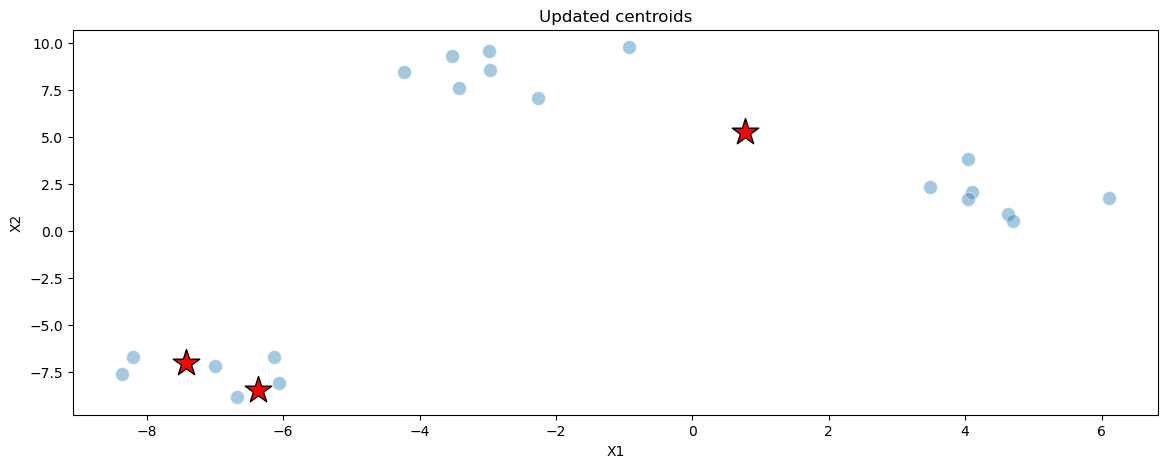

In [56]:
plt.figure(figsize = (14,5))
sns.scatterplot(data = df, x ='X1', y = 'X2',palette = 'tab10',s = 100, alpha = 0.4)
plt.title('Updated centroids')
plt.scatter(new_centers['X1'],new_centers['X2'], marker = '*', s = 400, c = 'red', edgecolor = 'black')

### Exploration

In the next assignment you will use a built in `sklearn` estimator to conduct the KMeans clustering algorithm.  If interested try to use the example code above as a guide to repeat the cluster assignments based on these new centroids, label observations, and update the centroids.  Ideally, you would do this either a set number of iterations or until the distance between updated centroids stabalizes from one iteration to the next.

In [57]:
def KMeans(X, centers = 3, iterations = 100):
    #select centers at random
    starting_centers = ''
    #for each iteration
    
        #determine intercluster variance

        #make cluster assignments

        #update centroids

        #repeat
    return ''

In [ ]:
def KMeans(X, centers = 3, iterations = 100):
    starting_centers = '
    

## Codio Activity 6.7: Conducting K-Means in Scikit-Learn

This activity focuses on using `sklearn` to perform `KMeans` clustering.  You will compare initialization methods and determine the "right" number of clusters using an elbow plot.  The data are again produced using `sklearn`.    

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [58]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

### Creating the Data

Data are created with a known number of cluster centers to make the evaluation of the clustering more straightforward.  A dataset with three features and four clusters is created and plotted below.  Your task is to uncover these clusters using `KMeans`.  

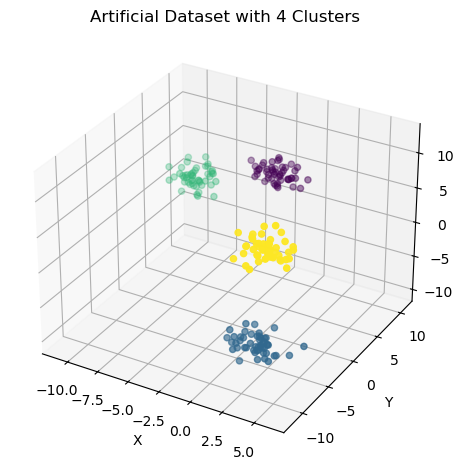

In [75]:
X,y = make_blobs(n_samples = 200,random_state = 42,centers =4,n_features = 3)
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],c=y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout()

## Problem 1

### Instantiate `KMeans`

To begin, you are to create an instance of the `KMeans` clusterer.  Slightly different than the lectures, we directly import the `KMeans` object. 

Instantiate a `KMeans()` classifier and assign the result to `kmeans`.


Inside the `KMeans()` classifier, set `random_state = 42`.

In [76]:
kmeans = KMeans(random_state = 42)

## Problem 2

### Using `KMeans`

To conduct the `KMeans` clustering algorithm on the data, use the `.fit()` method on `kmeans` with argument equal to `X`.  

This will run the clustering algorithm on our data and make clustering assignments accordingly.  

In [77]:
kmeans.fit(X)

KMeans(random_state=42)

## Problem 3

### Checking the `inertia_` attribute.  

After the cluster object has been fit, examine the inertia of your clusters.

To achieve this, apply the `.inertia_` attribute on `kmeans`  to retrive the inertia of each cluster.

Save your result to the variable `inertia` below.

In [78]:
inertia = kmeans.inertia_

## Problem 4

### Trying different numbers of clusters

Our first cluster model used 8 cluster centers.  

Below, use a `for` loop to create a list of inertia scores for models with $1, 2, 3, ..., 10$ cluster centers and append the `.inertia_` value for each to the list `inertias`.  Note that for each instance of `KMeans` you create, set `n_clusters` equal to `i` and the `random_state` equal to `42`.  

In [79]:
### GRADED

inertias = [] 
#for each value 1 - 10

       #instantiate new KMeans instance
        #Don't Forget to set the random_state!!!
        
        #fit the model
        
        #append inertia score to inertias list

### BEGIN SOLUTION

In [80]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias.append(inertia)
print(inertias)

[26101.998581982098, 8679.882995317124, 1713.2851336555375, 554.3359020785316, 514.844614679354, 476.21328007904924, 441.22708952148594, 409.51725161872173, 391.0954527833868, 359.16654267940385]


## Problem 5

### Plotting the results

Now that we have inertia values for `n_clusters` 1, 2, 3, ..., 10, a plot is drawn of the resulting centers and inertia scores.  The $x$-axis should contain the number of cluster centers and the $y$-axis should represent the inertia scores.  Uncomment the plotting code to examine a plot of these inertia values by cluster centers.  According to this plot, which do you feel is the "right" number of cluster centers for the data?  Assign your answer as an integer to `best_n_clusters` below. 

Text(0.5, 1.0, 'Inertia Score by n cluster centers')

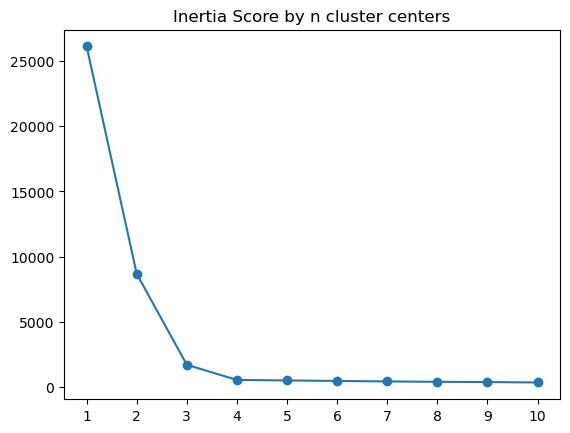

In [89]:
plt.plot(range(1,11),inertias,marker = 'o')
plt.xticks(list(range(1, 11)), list(range(1, 11)))
plt.title('Inertia Score by n cluster centers')

In [90]:
best_n_clusters = 3

## Problem 6

### Repeat with `random` initialization of centroids

Note that by default the `KMeans` clusterer in sklearn uses `kmeans++` to initialize the center of the clusters.  

Repeat the implementation of Problem 4 where you loop over values $1, 2, 3, ..., 10$ for the `n_clusters` but now initialize the centers randomly by setting the argument `init` equal to `random`.  Be sure to set `random_state = 42` and save your list of inertias to `random_inertias`.  


Does the idea number of clusters change?  Enter your response to the best number of cluster centers when using `random` initialization to `best_n_clusters_random` as an integer below.

In [93]:
random_inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42).fit(X)
    random_inertias.append(kmeans.inertia_)
print(random_inertias)

[26101.998581982098, 8679.882995317124, 1713.2851336555375, 554.3359020785316, 512.3646265768417, 476.1930457715391, 441.07711384916325, 414.23276514784664, 382.9799159771909, 356.0619479858318]


Text(0.5, 1.0, 'Random Inertia Score')

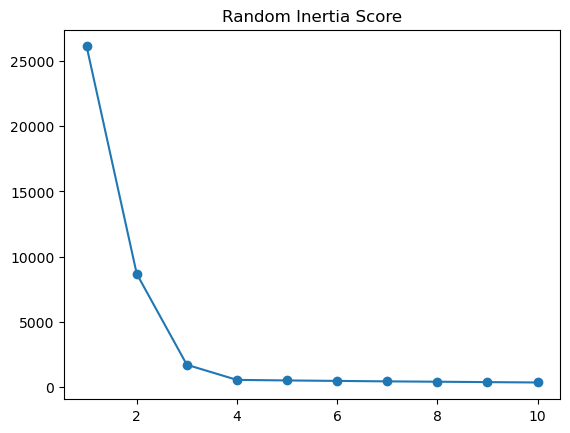

In [95]:
plt.plot(range(1,11), random_inertias,marker = 'o')
plt.title('Random Inertia Score') 

In [96]:
random_best_n_clusters = 3

## Codio Activity 6.8: Running PCA with Clustering

Now that you've seen how to use PCA to reduce the dimensionality of data while maintaining important information, it is time to see how we can use these ideas applied to a real dataset. In this activity you will use a dataset related to marketing campaigns with the task being to identify groups of similar customers.  Once the cluster labels are assigned, you will briefly explore inside of each cluster for patterns that help identify characteristics of customers.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)
- [Problem 8](#Problem-8)
- [Problem 9](#Problem-9)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings

In [3]:
warnings.filterwarnings("ignore")

### The Dataset: www.kaggle.com/imakash3011/customer-personality-analysis

More information on the dataset can be found [here](https://www.kaggle.com/imakash3011/customer-personality-analysis).  Below the data is loaded, the info is displayed, describe the continuous features, and the first five rows of the data are displayed.

In [4]:
df = pd.read_csv('data/marketing_campaign.csv',sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Problem 1

### Preparing the Data

Before starting to build cluster models, the data needs to be limited to numeric representations.  How many non-numeric columns are there, and what are their names?  Assign you solution as a list of strings to `object_cols` below.  The names should match the column names in the DataFrame exactly.  

In [7]:
object_cols = df.select_dtypes('object').columns.tolist()
object_cols

['Education', 'Marital_Status', 'Dt_Customer']

## Problem 2

### Dropping the `object` columns 

To simplify things, eliminate the columns containing `object` datatypes.  Assign your new DataFrame to `df_numeric` below.

In [8]:
df_numeric = df.drop(object_cols, axis =1)
df_numeric.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


## Problem 3

### Dropping non-informative columns

Two columns, `Z_CostContact`, and `Z_Revenue` have one unique value. Also, the `ID` column is basically an index. These will not add any information to our problem. Drop the columns `Z_CostContact`, `Z_Revenue`, and `ID` and save your all numeric data without these two columns as a DataFrame to `df_clean` below.

In [9]:
object_cols = df.select_dtypes('object').columns.tolist() + ['Z_CostContact','Z_Revenue','ID']
object_cols

['Education',
 'Marital_Status',
 'Dt_Customer',
 'Z_CostContact',
 'Z_Revenue',
 'ID']

In [10]:
df_clean = df.drop(object_cols, axis = 1)
df_clean.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


## Problem 4

### Dropping the missing data

Note that the `Income` column is missing data.  This will cause issues for `PCA` and clustering algorithms.  Drop the missing data using pandas `.dropna` method on `df_clean`, and assign your non-missing dataset as a DataFrame to `df_clean_nona` below. 

In [11]:
df_clean_nona = df_clean.dropna()

In [12]:
df_clean_nona.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


## Problem 5

### Scaling the Data

As earlier with the PCA models, the data needs to be mean centered.  

Below, scale the `df_clean_nona` by subtracting its mean and by dividing it by its standard deviation.  Assign your results as a DataFrame to `df_scaled` below.  

In [13]:
df_scaled = (df_clean_nona - df_clean_nona.mean())/ df_clean_nona.std()
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.986220,0.234010,-0.822854,-0.928763,0.310462,0.978005,1.549080,1.689845,2.454014,1.484492,...,2.504147,-0.554018,0.693076,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,2.377415
1,-1.236522,-0.234507,1.039704,0.908861,-0.380424,-0.871827,-0.637184,-0.717824,-0.650891,-0.633737,...,-0.570954,-1.169254,-0.131545,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435
2,-0.318750,0.769304,-0.822854,-0.928763,-0.794955,0.358430,0.569031,-0.178328,1.339901,-0.146788,...,-0.229276,1.291690,-0.543855,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435
3,1.266492,-1.017009,1.039704,-0.928763,-0.794955,-0.871827,-0.561796,-0.655403,-0.504778,-0.585042,...,-0.912631,-0.554018,0.280765,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435
4,1.016190,0.240167,1.039704,-0.928763,1.554056,-0.391582,0.418254,-0.218456,0.152731,-0.000703,...,0.112402,0.061218,-0.131545,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435


## Problem 6

### PCA

With the data cleaned and scaled, you are ready to perform PCA.  Below, use the `PCA` transformer from `sklearn` to transform your data and select the top three principal components.  First, create an instance of the `PCA` that limits the number of components to 3 using the `n_components` argument.  Also, set the argument `random_state = 42`  and assign your instance as `pca` below.

In [24]:
pca = PCA(n_components = 3, random_state = 42)
pca

PCA(n_components=3, random_state=42)

## Problem 7

### Extracting the Components

Use the `.fit_transform` method with argument equal to `df_scaled` on `pca` to extract the three principal components.  Save these components as an array to the variable `components` below.  

In [25]:
components = pca.fit_transform(df_scaled)
components

array([[ 3.76975092, -0.05658808, -0.31444781],
       [-2.3813019 ,  0.21412971, -0.20576801],
       [ 1.61742347,  0.13217577, -1.05222563],
       ...,
       [ 1.46347205, -0.01480199,  0.95754885],
       [ 1.75379824,  1.34746131, -0.98261552],
       [-1.68638112,  0.66091777,  1.15092592]], shape=(2216, 3))

In [26]:
# pca.explained_variance_ratio_ indicates the importance of variance of PC1,PC2,PC3
pca.explained_variance_ratio_

array([0.28443482, 0.08841178, 0.08273063])

In [27]:
pca.explained_variance_ratio_.sum()

np.float64(0.4555772194254579)

## Problem 8

### `KMeans`

Complete the code below according to the instructions below:

- To the `kmeans` variable, assign the `KMeans` clusterer with argument `n_clusters` equal to `3` and argument `random_state` equal to `42`. To this, chain the `fit()` method with argument equal to `components`.
- Copy the code line that reads the data  in your solution code.
- Copy the code to drop the missing value in your solution. Here, inside the `dropna()` function, set the argument `subset` equal to `['Income']`.
- Inside `df_clustered`, create a new column `cluster`. To this column, assign `kmeans.labels_`.

In [28]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(components)
df_clustered = df.dropna(subset = ['Income'])
df_clustered['cluster'] = kmeans.labels_

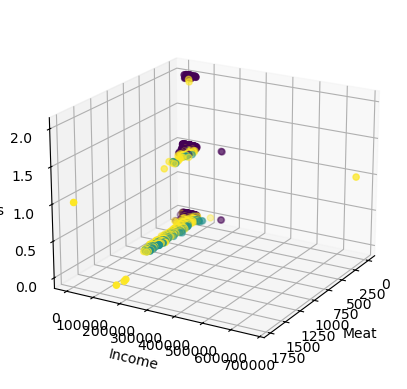

In [29]:
ax = plt.axes(projection = '3d')
ax.scatter3D(df_clustered['MntMeatProducts'],df_clustered['Income'],df_clustered['Kidhome'], c=df_clustered['cluster'])
ax.set_xlabel('Meat')
ax.set_ylabel('Income')
ax.set_zlabel('Kids')
#ax.set_xticklabels([i for i in range(0, 1751, 250)], rotation = 90)
# Plot the surface
#ax.plot_surface(X, Y, Z, cmap='viridis')

# Set the azimuth and elevation angles
ax.view_init(azim=30,  elev=20)


<Axes: >

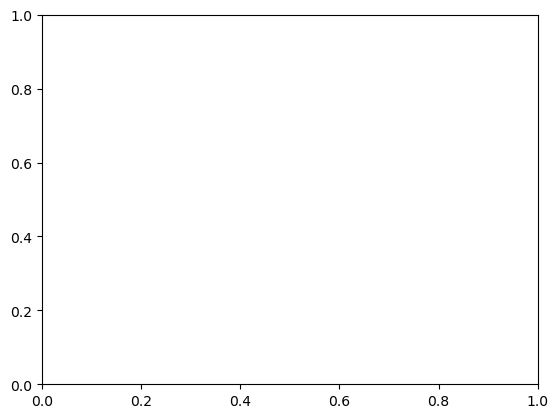

In [30]:
plt.axes()

Text(0.5, 1.0, 'Hello')

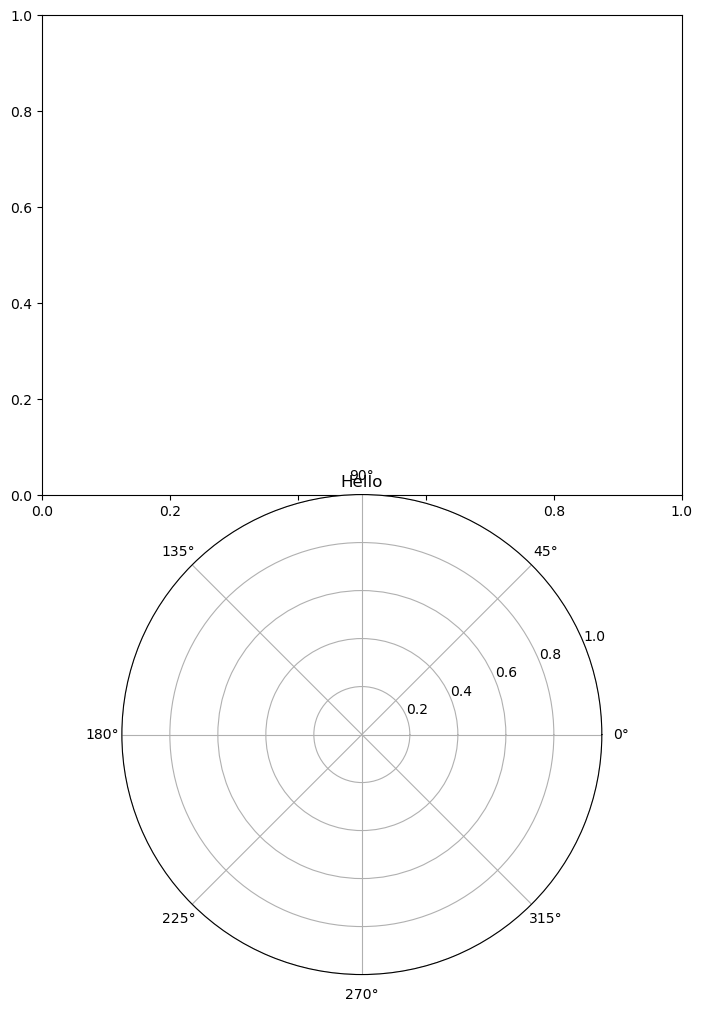

In [31]:
fig = plt.figure()
a = fig.add_axes((0,1,1,1))
b = fig.add_axes((0,0,1,1), projection="polar")
b.set_title("Hello")

(<Figure size 1500x700 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

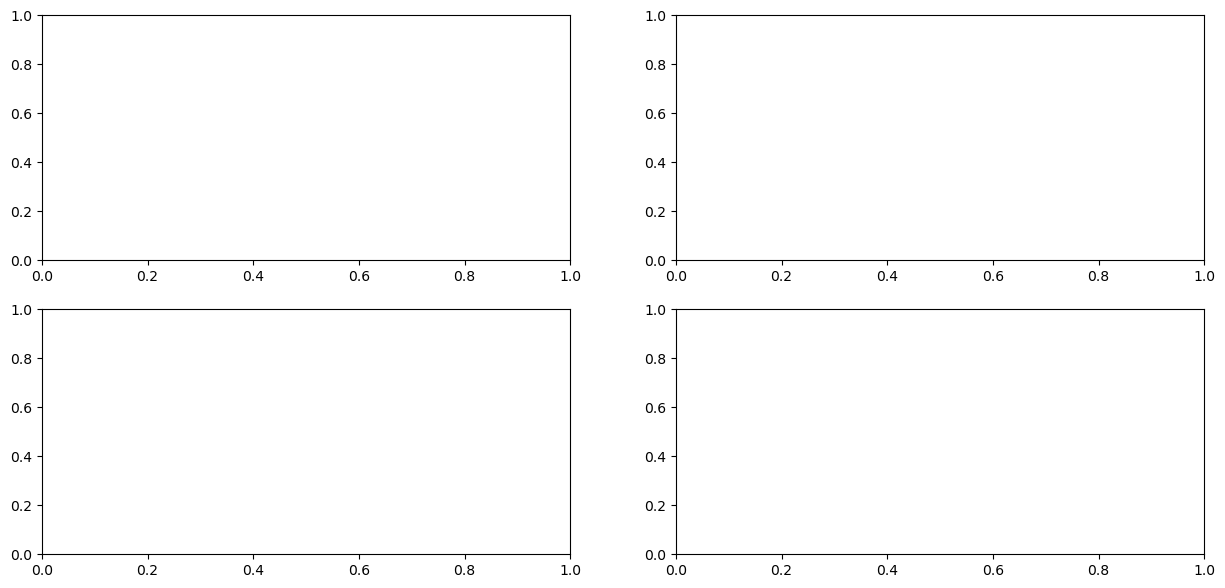

In [32]:
#fig, ax = plt.subplots(1,2, figsize= (15,7))
#ax[0].set_title("hello")
#ax[1] = plt.axes(projection="3d")

plt.subplots(2,2, figsize= (15,7))

<BarContainer object of 2216 artists>

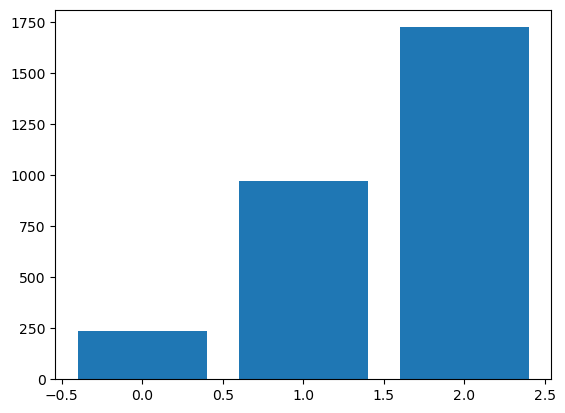

In [33]:
plt.bar(df_clustered['cluster'],df_clustered['MntMeatProducts'])

## Problem 9

### Examining the Results

The image below shows a `boxenplot` of the clusters based on amounts spent on meat products.  If you were marketing a meat sale and there is a cost involved in advertisiting per customer.  If you were to select only one cluster to market to, which cluster would you target? Assign your response as an integer to `target_cluster` below.

![](images/meats.png)

In [34]:
target_cluster = 3

While this is a start, there is much more work to be done.  We glossed over perhaps one of the most important parts of the task -- feature engineering.  Some of the columns that were objects could be represented numerically.  Also, we could try different numbers of components from PCA and numbers of clusters.  In a business setting, it is important to keep the number of clusters small so that the groups can be distinguished in meaningful ways, so we don't want to let the number of clusters get too large.  

## Codio Activity 6.9: Running DBSCAN

This activity focuses on using the `DBSCAN` clustering algorithm with `sklearn`.  Contrary to the `KMeans` clusterer, `DBSCAN` does not take a number of clusters as argument.  Instead, the algorithm separates data based on areas of high and low density.  The parameters that determine this density are the `min_samples` and `eps` values.  We will explore how different values for these affect the clustering for our sample dataset.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [35]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d

### The Dataset

Again, data is generated using the `sklearn` datasets `make_blobs` function.  

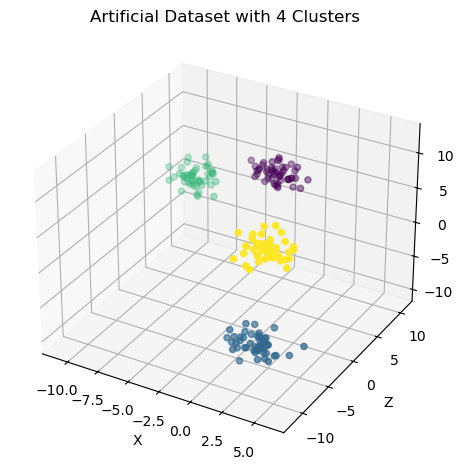

In [42]:
X,y = make_blobs(n_samples = 200, random_state = 42, n_features = 3, centers = 4)
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],c = y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout()

## Problem 1

### Instantiate a `DBSCAN` object

The `DBSCAN` clusterer has been imported explicitly from the `sklearn` library.  Create a new instance of this clusterer and assign it to the variable `dbscan` below.   Leave all the arguments to their default setting.


In [43]:
dbscan = DBSCAN()

In [44]:
dbscan

DBSCAN()

## Problem 2

### Cluster the data

Now, use your clusterer `dbscan` to fit the data using the function `fit()` with argument equal to `X`.  

Again, you will not receive an output from the fit, but information will be stored in the instance.  To examine the labels, use the `.labels_` attribute of the fit model to access the predicted labels.  Assign your predicted labels as an array to the variable `predictions` below.

In [46]:
dbscan = DBSCAN().fit(X)
predictions = dbscan.labels_
predictions

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

## Problem 3

### Examining the predicted labels

Use `np.unique` function with argument equal to `predictons` to examine the unique values of the predicted values.  Assign the unique values of the labels to `unique_labels` below.  

How many cluster labels were determined by the algorithm?  Assign your answer as an integer to `n_clusters_default` below.

In [47]:
unique_labels = np.unique(predictions)
unique_labels

array([-1])

In [48]:
n_clusters_default = 0

## Problem 4

### Recognizing the limitations

Here, the predictions of the DBSCAN algorithm don't seem to be very good.  This is due to you using an inappropriate value for the `eps` attribute.  The default value is `eps = 0.5`, and this is used to determine the density of a cluster.  Our points are seperated by larger distances, so we should increase `eps` to a larger value in hopes of getting a better performing clustering. 

Below, instantiate and fit a `DBSCAN` clusterer with argument `eps` equal to `2.0` as `dbscan_eps_2` and examine the unique labels by chaining the `fit(X)` function.  

Next, use the `labels_` method on `dbscan_eps_2` and assign the new clusters labels as a NumPy array to `predictions_eps_2` below.  

Finally, use the NumPy function `unique` to assign the unique values of `predictions_eps_2` to `unique_labels_eps_2`.

In [49]:
dbscan_eps_2 = DBSCAN(eps = 2.0).fit(X)
predictions_eps_2 = dbscan_eps_2.labels_
predictions_eps_2

array([ 0,  1,  2,  0,  3,  1,  2,  3,  3,  1,  3,  0,  2,  3,  0,  2,  0,
        1,  1,  3,  1,  1,  3,  3,  3,  1,  1,  1,  3,  2,  0,  2,  0,  3,
        1,  0,  1,  3,  3,  1,  1,  2,  0,  0,  1,  2,  2,  2,  2,  1,  0,
        3,  1,  0,  2,  2,  0,  1,  0,  0,  2,  1,  1,  3,  3,  2,  3,  0,
        0,  2,  2,  2,  3,  2,  3,  1,  1,  0, -1,  1,  0,  1,  0,  1,  0,
        0,  1,  2,  1,  0,  3,  0,  3,  2,  0,  2,  0,  1,  1,  0,  1,  0,
        2,  1,  3,  0,  1,  1,  2,  2,  2,  0,  2,  2,  1,  2,  0,  2,  0,
        0,  2,  0,  0,  2,  3,  1,  3,  3,  2,  2,  1,  3,  3,  0,  2,  3,
        3,  3,  1,  2,  3,  3,  0,  2,  0,  1,  0,  1,  3,  0,  0,  2,  0,
        3,  3,  2,  2,  0,  2,  3,  0,  3,  3,  0,  1,  0,  0,  1,  1,  1,
        2,  3,  3,  1,  2,  3,  3,  2,  1,  3,  3, -1,  2,  0,  2,  0,  3,
        0,  3,  3,  3,  1,  2,  1,  1,  3,  1,  3,  2,  1])

In [50]:
unique_labels_eps_2 = np.unique(predictions_eps_2)
unique_labels_eps_2

array([-1,  0,  1,  2,  3])

## Problem 5

### How many non-cluster points

Below, you can examine the results of the clustering.  Note that `DBSCAN` will always return the same clustering of a given dataset.  Also, while increasing `eps` led to a much more coherent clustering, some points were not identified as belonging to a cluster. Determine how many points were labeled as noise with your `dbscan_eps_2` predictions and assign this as an integer to `noise_eps_2` below.

![](images/eps2.png)

In [51]:
unique_labels, counts = np.unique(predictions_eps_2, return_counts = True)
counts

array([ 2, 50, 50, 48, 50])

In [53]:
noise_eps_2 = counts[0]
noise_eps_2

np.int64(2)

### Examining the difference across multiple epsilons

In [54]:
epsilons = np.arange(0.1,10,0.2)
epsilons

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1,
       5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7,
       7.9, 8.1, 8.3, 8.5, 8.7, 8.9, 9.1, 9.3, 9.5, 9.7, 9.9])

In [61]:
#examine the number of clusters created with 
#each epsilon value. 
#Plot the results

# n_clusters_list = []
# for eps in epsilons:
#     db = DBSCAN(eps = eps).fit(X)
#     n_clusters = len(np.unique(db.labels_))
#     n_clusters_list.append(n_clusters)
# plt.plot(epsilons, n_clusters_list)
# plt.xlabel('Epsilon')
# plt.ylabel('Number of Clusters')
# plt.title('How the Number of Clusters varies with eps');

In [57]:
clusters = []
for i in epsilons:
    db = DBSCAN(eps = i).fit(X)
    predict = db.labels_
    clusters.append(len(np.unique(predict)))
print(clusters)

[1, 1, 1, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


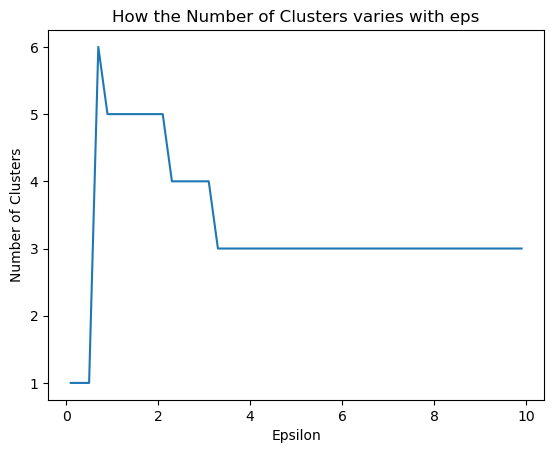

In [60]:
plt.plot(epsilons,clusters)
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('How the Number of Clusters varies with eps');